Mean Squared Error: 16.64206816007799
Root Mean Squared Error (RMSE): 4.079469102723784
Mean Absolute Error (MAE): 2.9723987687789615
R² (R-squared): 0.806412457593093


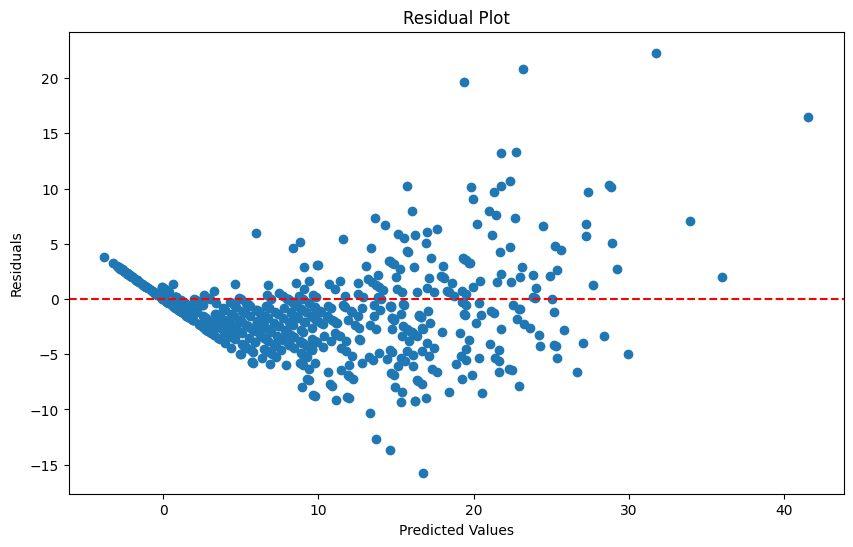

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


players_df_4 = pd.read_csv('../../data/processed/lr_model_manual_feature2_training_testing_dataset.csv')
players_df_4.dropna(ignore_index=True, inplace=True)

# preparing the training/testing splits
training_df_4 = players_df_4[players_df_4['Season'] != 2024].reset_index(drop=True)
testing_df_4 = players_df_4[players_df_4['Season'] == 2024].reset_index(drop=True)

# preparing the training/testing splits
X_train_4 = training_df_4.drop(columns=['HR', 'Season'])
y_train_4 = training_df_4['HR']

X_test_4 = testing_df_4.drop(columns=['HR', 'Season'])
y_test_4 = testing_df_4['HR']

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_4, y_train_4)

# Make predictions on the test set
y_pred = model.predict(X_test_4)

# Evaluate the model (e.g., using Mean Squared Error)
mse = mean_squared_error(y_test_4, y_pred)
print(f'Mean Squared Error: {mse}')

# MSE is already computed, so we take its square root to get RMSE
rmse = np.sqrt(mean_squared_error(y_test_4, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

mae = mean_absolute_error(y_test_4, y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(y_test_4, y_pred)
print("R² (R-squared):", r2)

# Residuals (actual - predicted values)
residuals = y_test_4 - y_pred

# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [ ]:
X_train_4.insert(0, 'intercept', 1)
X_test_4.insert(0, 'intercept', 1)
sm_model_4 = sm.OLS(y_train_4, X_train_4).fit()
sm_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HR   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     5383.
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:23:43   Log-Likelihood:                -20684.
No. Observations:                7404   AIC:                         4.138e+04
Df Residuals:                    7397   BIC:                         4.143e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -4.7133      0.270    -17.484      0.000      -5.242      -4.185
season_factor     2.9636      0.304      9.759      0.000       2.368       3.559
RBI/G             9.2730      0.315     29.411      0.000       8.655       9.891
BB                0.1432      0.004     34.057      0.000       0.135       0.151
SO                0.0767      0.002     37.071      0.000       0.073       0.081
Barrel%          15.5101      1.055     14.706      0.000      13.443      17.577
HardHit%         -1.4940      0.313     -4.776      0.000      -2.107      -0.881
==============================================================================
Omnibus:                     1248.718   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6346.804
Skew:                           0.721   Prob(JB):                         0.00
Kurtosis:                       7.300   Cond. No.                     1.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y_test_4_predictions = sm_model_4.predict(X_test_4)

r2 = r2_score(y_test_4, y_test_4_predictions)

print(f"R squared: {r2}")

R squared: 0.8064124575930963
